In [2]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__) # tf 버전 확인

2.20.0


In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # 학습셋과 평가셋 분리해서 로드
is_normalized = False

Training set의 이미지 개수: 60000
Test set의 이미지 개수: 10000
이미지 크기: 28 X 28
정답값 예시: [9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4]
이미지 값 예시: 
[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 24

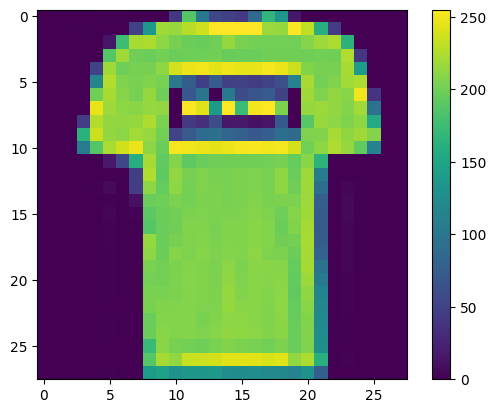

In [3]:
print("Training set의 이미지 개수: %d" %train_images.shape[0])
print("Test set의 이미지 개수: %d" %test_images.shape[0])
print("이미지 크기: %d X %d" %(train_images.shape[1], train_images.shape[2]))
print("정답값 예시: %s" %str(train_labels[:20]))
print("이미지 값 예시: \n%s" %str(train_images[1]))
plt.figure() # 그림 입력 준비
plt.imshow(train_images[1]) # 데이터 입력
plt.colorbar() # 우측 컬러바
plt.show() # 이미지 출력

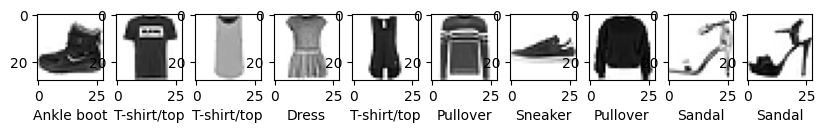

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10)) # 그림 크기 10x10
for i in range(10):
    plt.subplot(1,10,i+1) # 그림 위치 = 10개 중 i+1번째
    plt.grid(False) # 격자 off
    plt.imshow(train_images[i], cmap=plt.cm.binary) # 학습셋의 i번째 샘플 이미지 입력. cmap(컬러맵)은 binary(회색조)
    plt.xlabel(class_names[train_labels[i]]) # 학습셋의 i번째 샘플 정답 인덱스 = train_labels[i]. class_names는 인덱스를 클래스명으로 변환
plt.show() # 이미지 출력

In [39]:
if not is_normalized: # is_normalized 변수가 False라면
  train_images = train_images / 255.0 # 0~255 to 0~1
  test_images = test_images / 255.0 # 0~255 to 0~1

  is_normalized = True # 정규화 완료

In [19]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7969 - loss: 0.6030 - val_accuracy: 0.8194 - val_loss: 0.5243
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8426 - loss: 0.4615 - val_accuracy: 0.8313 - val_loss: 0.4786
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8506 - loss: 0.4371 - val_accuracy: 0.8375 - val_loss: 0.4613
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8546 - loss: 0.4219 - val_accuracy: 0.8384 - val_loss: 0.4670
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8579 - loss: 0.4134 - val_accuracy: 0.8371 - val_loss: 0.4588
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8593 - loss: 0.4070 - val_accuracy: 0.8420 - val_loss: 0.4535
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8607 - loss: 0.4024 - val_accuracy: 0.8434 - val_loss: 0.4456
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8615 - loss: 0.3983 - 

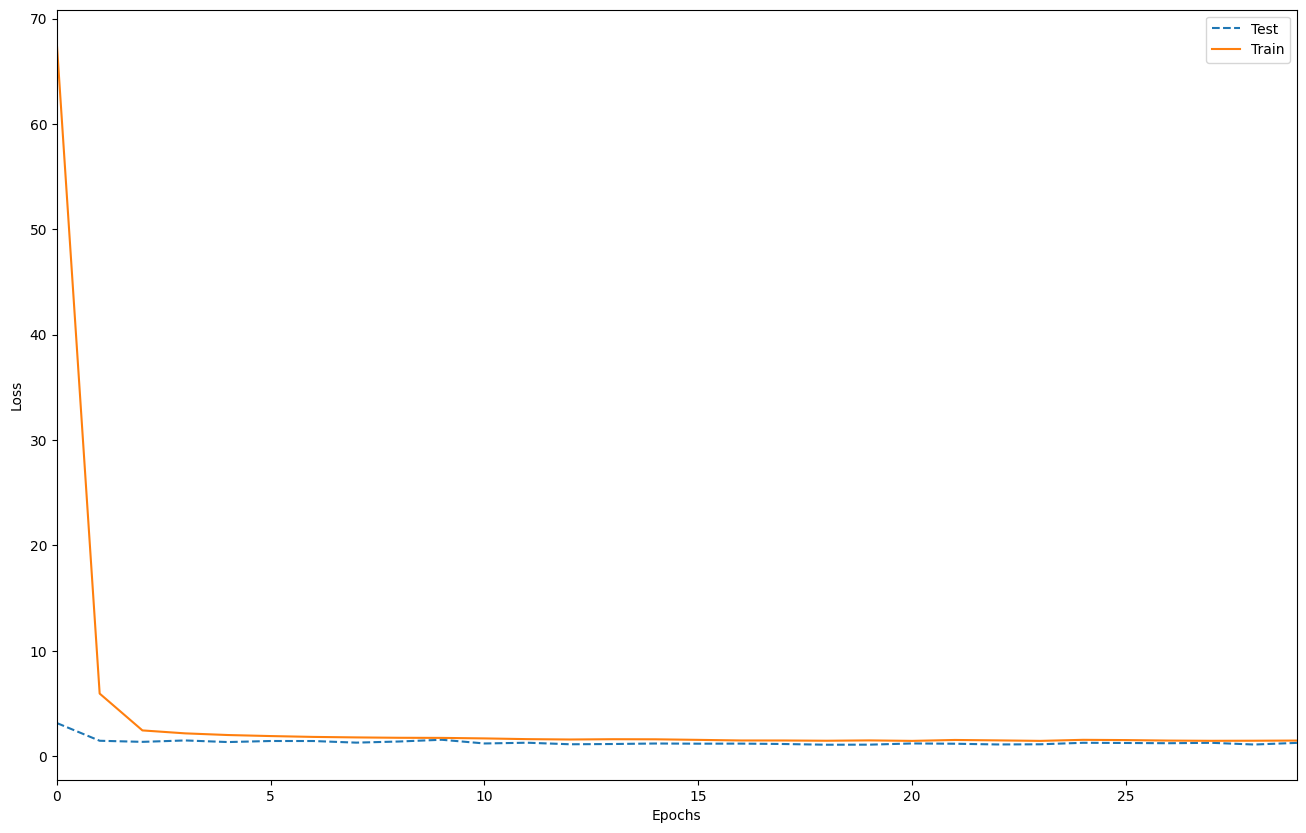

In [10]:
def plot_loss(history):
  plt.figure(figsize=(16,10)) # 그림 크기 = (16, 10)
  plt.plot(history.epoch, history.history['val_loss'], '--', label='Test') # validation loss를 에폭마다 점선으로 표시
  plt.plot(history.epoch, history.history['loss'], label='Train') # training loss를 에폭마다 실선으로 표시

  plt.xlabel('Epochs') # x축은 에폭
  plt.ylabel("Loss") # y축은 loss
  plt.legend() # 우측상단에 범례 표시

  plt.xlim([0,max(history.epoch)]) # x축은 0부터 에폭 최대값까지

plot_loss(history) # history 출력

In [8]:
def eval_model(model):
  test_loss, test_acc = model.evaluate(test_images, test_labels) # test셋으로 모델 평가
  print('Test accuracy:', test_acc) # 정확도 출력

eval_model(model)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5729 - loss: 1.2589
Test accuracy: 0.5728999972343445


In [12]:
prediction = model.predict(test_images)
print(np.argmax(prediction[0]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step
9


In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation=tf.nn.tanh),
    keras.layers.Dense(512, activation=tf.nn.tanh),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8241 - loss: 0.4840 - val_accuracy: 0.8174 - val_loss: 0.5086
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8612 - loss: 0.3805 - val_accuracy: 0.8551 - val_loss: 0.4112
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8705 - loss: 0.3486 - val_accuracy: 0.8605 - val_loss: 0.3765
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8766 - loss: 0.3287 - val_accuracy: 0.8639 - val_loss: 0.3738
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8827 - loss: 0.3123 - val_accuracy: 0.8674 - val_loss: 0.3665
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8855 - loss: 0.3071 - val_accuracy: 0.8536 - val_loss: 0.4005
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8909 - loss: 0.2935 - val_accuracy: 0.8724 - val_loss: 0.3525
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8925 - loss: 0

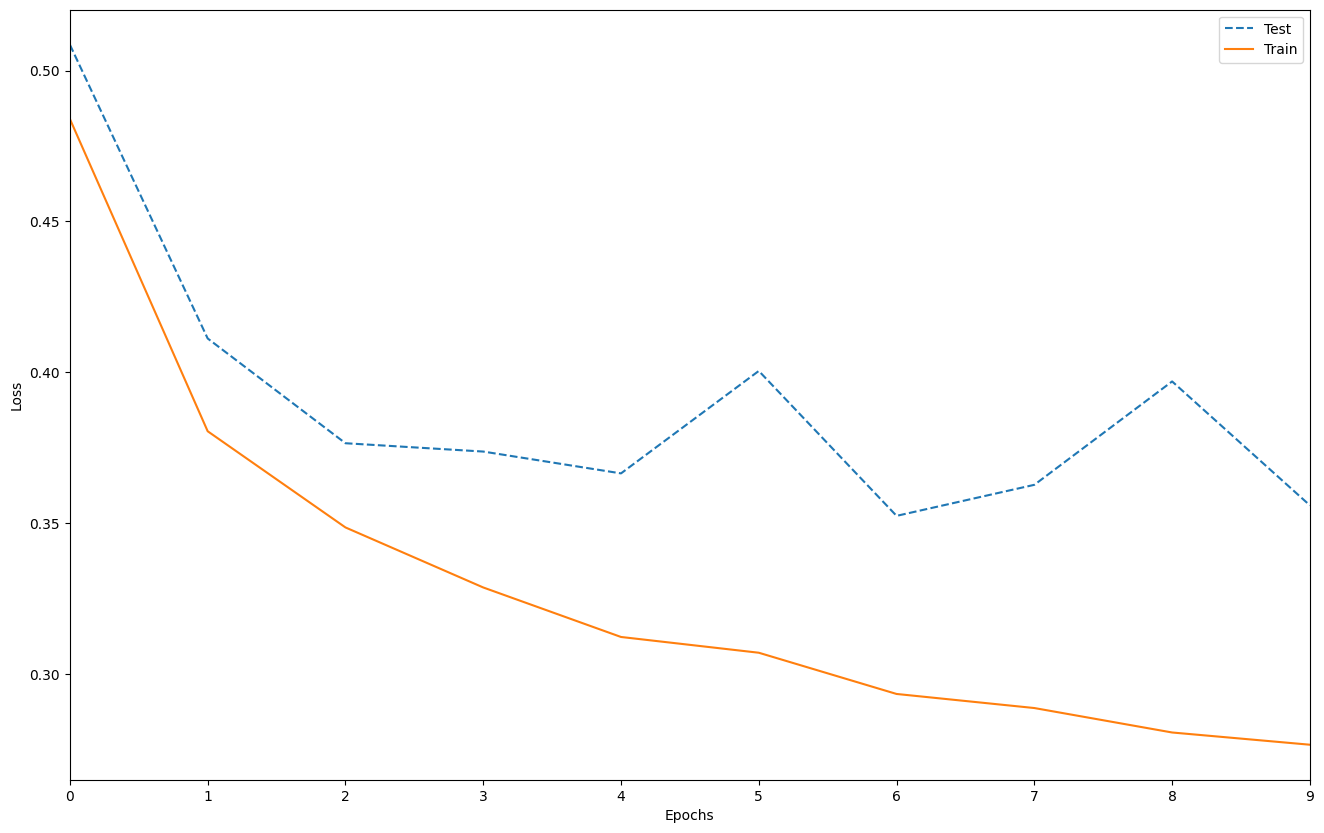

In [15]:
model.compile(optimizer='adam', # Adam optimizer
              loss='sparse_categorical_crossentropy', # categorical_crossentropy: 다중 분류 손실함수. sparse: integer type 클래스로 one-hot encoding 과정을 하지 않아도 된다.
              metrics=['accuracy']) # 정확도로 평가

history = model.fit(train_images, # 학습셋 이미지
          train_labels, # 학습셋 레이블
          epochs=10, # 에폭
          validation_data=(test_images, test_labels) # 평가셋으로 검증
         )

plot_loss(history) # 저장된 history를 입력해 loss 변화 출력
eval_model(model) # model 평가

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # (28,28) 크기의 입력을 784로 평탄화
    keras.layers.Dense(512, activation=tf.nn.tanh), # 784 -> 512. 활성함수는 tanh
    keras.layers.Dense(512, activation=tf.nn.tanh), # 512 -> 512. 활성함수는 tanh
    keras.layers.Dense(512, activation=tf.nn.tanh), # 512 -> 512. 활성함수는 tanh
    keras.layers.Dense(512, activation=tf.nn.tanh), # 512 -> 512. 활성함수는 tanh
    keras.layers.Dense(512, activation=tf.nn.tanh), # 512 -> 512. 활성함수는 tanh
    keras.layers.Dense(512, activation=tf.nn.tanh), # 512 -> 512. 활성함수는 tanh
    keras.layers.Dense(512, activation=tf.nn.tanh), # 512 -> 512. 활성함수는 tanh
    keras.layers.Dense(512, activation=tf.nn.tanh), # 512 -> 512. 활성함수는 tanh
    keras.layers.Dense(512, activation=tf.nn.tanh), # 512 -> 512. 활성함수는 tanh
    keras.layers.Dense(10, activation=tf.nn.softmax) # 512 -> 10. softmax로 확률값 반환
])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 24ms/step - accuracy: 0.7250 - loss: 0.7795 - val_accuracy: 0.7493 - val_loss: 0.7408
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.7283 - loss: 0.7394 - val_accuracy: 0.7806 - val_loss: 0.6539
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.7750 - loss: 0.6399 - val_accuracy: 0.7339 - val_loss: 0.6471
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.7950 - loss: 0.5940 - val_accuracy: 0.8145 - val_loss: 0.5584
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.8017 - loss: 0.5702 - val_accuracy: 0.7768 - val_loss: 0.5976
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.8081 - loss: 0.5512 - val_accuracy: 0.8018 - val_loss: 0.5987
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.8020 - loss: 0.5637 - val_accuracy: 0.7763 - val_loss: 0.6466
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.8174 -

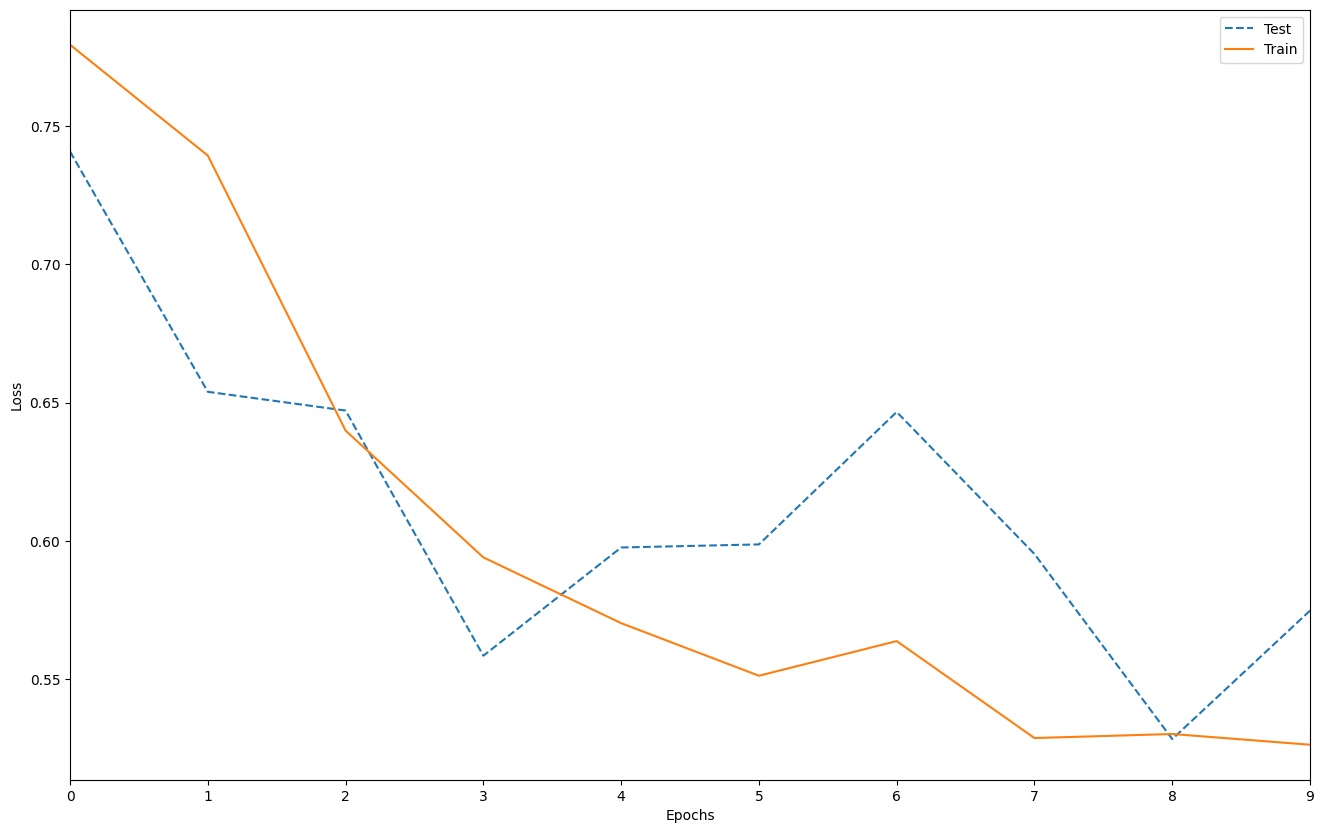

In [17]:
model.compile(optimizer='adam', # adam optimizer
              loss='sparse_categorical_crossentropy', # categorical_crossentropy: 다중 분류 손실함수. sparse: integer type 클래스로 one-hot encoding 과정을 하지 않아도 된다.
              metrics=['accuracy']) # 정확도로 평가

history = model.fit(train_images, # 학습셋의 이미지
          train_labels, # 학습셋의 레이블
          epochs=10, # 에폭 = 10
          validation_data=(test_images, test_labels) # 평가셋으로 검증
         )

plot_loss(history) # 기록된 history를 출력
eval_model(model) # 모델을 평가

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # (28,28) 크기의 입력을 784로 평탄화
    keras.layers.Dense(512, activation=tf.nn.relu), # 784 -> 512. 활성함수는 relu
    keras.layers.Dense(512, activation=tf.nn.relu), # 512 -> 512. 활성함수는 relu
    keras.layers.Dense(512, activation=tf.nn.relu), # 512 -> 512. 활성함수는 relu
    keras.layers.Dense(512, activation=tf.nn.relu), # 512 -> 512. 활성함수는 relu
    keras.layers.Dense(10, activation=tf.nn.softmax) # 512 -> 10. softmax로 확률값 반환
])

In [19]:
model.compile(optimizer='adam', # Adam optimizer
              loss='sparse_categorical_crossentropy', # categorical_crossentropy: 다중 분류 손실함수. sparse: integer type 클래스로 one-hot encoding 과정을 하지 않아도 된다.
              metrics=['accuracy']) # 정확도로 평가

history = model.fit(train_images[:2000], # 학습 데이터 2000개
          train_labels[:2000], # 학습 레이블 2000개
          epochs=30, # 에폭 = 30
          validation_data=(test_images, test_labels) # 평가셋으로 검증
         )

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.6315 - loss: 1.0252 - val_accuracy: 0.7181 - val_loss: 0.7293
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7855 - loss: 0.6037 - val_accuracy: 0.7665 - val_loss: 0.6404
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8315 - loss: 0.4846 - val_accuracy: 0.8003 - val_loss: 0.5820
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8210 - loss: 0.4747 - val_accuracy: 0.7724 - val_loss: 0.6471
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.8525 - loss: 0.4317 - val_accuracy: 0.7890 - val_loss: 0.6281
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8785 - loss: 0.3402 - val_accuracy: 0.7961 - val_loss: 0.6198
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.8545 - loss: 0.3920 - val_accuracy: 0.7676 - val_loss: 0.7564
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8810 - loss: 0.3196 - val_accuracy: 0.7856 - v

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8163 - loss: 0.9286
Test accuracy: 0.8162999749183655


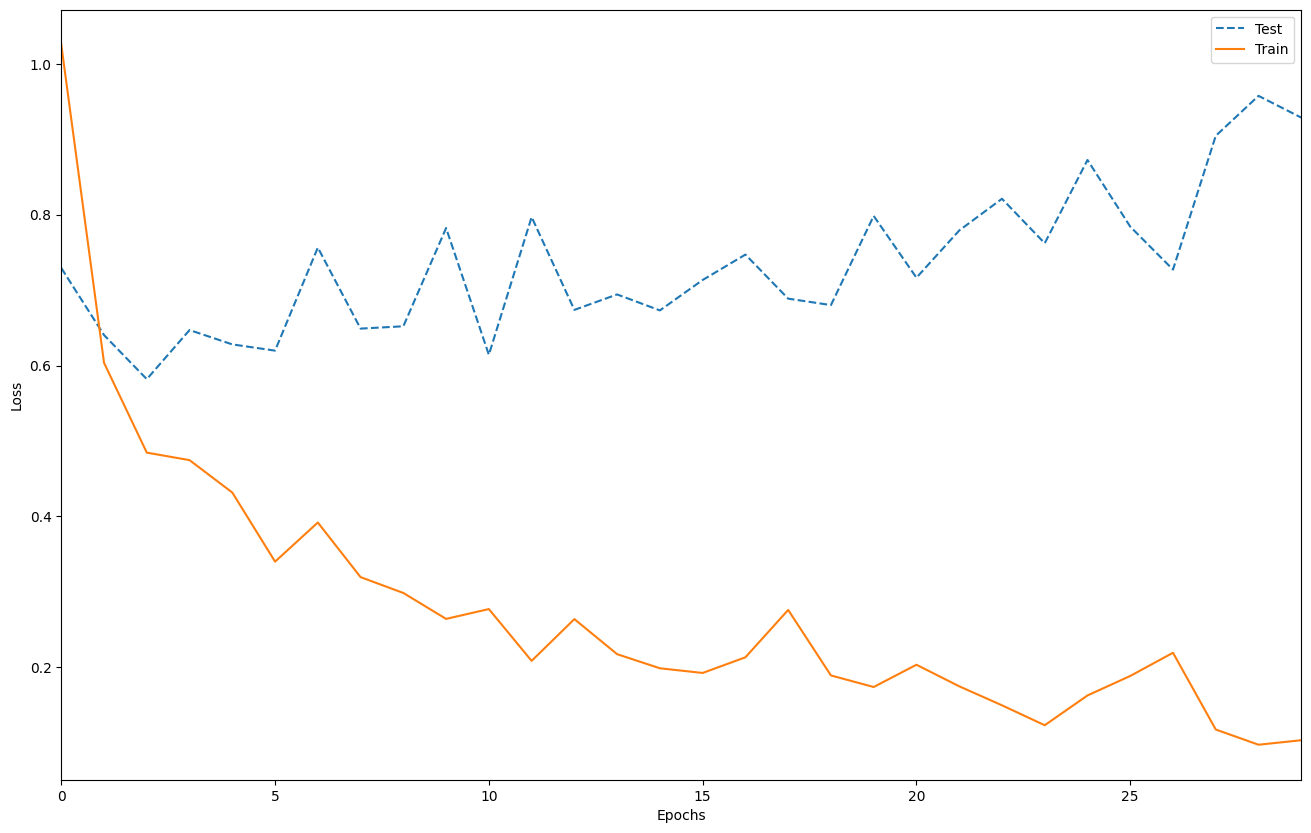

In [20]:
plot_loss(history) # 기록된 history로 loss 출력
eval_model(model) # 학습된 model 평가

In [21]:
drop_rate = 0.3

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # (28,28) 크기의 입력을 784로 평탄화
    keras.layers.Dense(512, activation=tf.nn.relu), # 784 -> 512. 활성함수는 relu
    keras.layers.Dropout(rate=drop_rate), # 설정해둔 확률로 dropout
    keras.layers.Dense(512, activation=tf.nn.relu), # 512 -> 512. 활성함수는 relu
    keras.layers.Dropout(rate=drop_rate), # 설정해둔 확률로 dropout
    keras.layers.Dense(512, activation=tf.nn.relu), # 512 -> 512. 활성함수는 relu
    keras.layers.Dropout(rate=drop_rate), # 설정해둔 확률로 dropout
    keras.layers.Dense(512, activation=tf.nn.relu), # 512 -> 512. 활성함수는 relu
    keras.layers.Dropout(rate=drop_rate), # 설정해둔 확률로 dropout
    keras.layers.Dense(10, activation=tf.nn.softmax) # 512 -> 10. softmax로 확률값 반환
])

In [22]:
model.compile(optimizer='adam', # Adam optimizer
              loss='sparse_categorical_crossentropy', # categorical_crossentropy: 다중 분류 손실함수. sparse: integer type 클래스로 one-hot encoding 과정을 하지 않아도 된다.
              metrics=['accuracy']) # 정확도로 평가

history = model.fit(train_images[:2000], # 학습 이미지 2000개
          train_labels[:2000], # 학습 레이블 2000개
          epochs=30, # 에폭 = 30
          validation_data=(test_images, test_labels) # 평가셋으로 검증
         )

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.4925 - loss: 1.3609 - val_accuracy: 0.6597 - val_loss: 0.8032
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.6990 - loss: 0.8141 - val_accuracy: 0.7051 - val_loss: 0.7755
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7455 - loss: 0.6988 - val_accuracy: 0.7532 - val_loss: 0.6678
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7875 - loss: 0.6160 - val_accuracy: 0.7756 - val_loss: 0.6234
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.8095 - loss: 0.5649 - val_accuracy: 0.7870 - val_loss: 0.5817
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8120 - loss: 0.5424 - val_accuracy: 0.7978 - val_loss: 0.6029
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8285 - loss: 0.4839 - val_accuracy: 0.7982 - val_loss: 0.5699
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8210 - loss: 0.4695 - val_accuracy: 0.7894 - v

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8134 - loss: 0.7089
Test accuracy: 0.8133999705314636


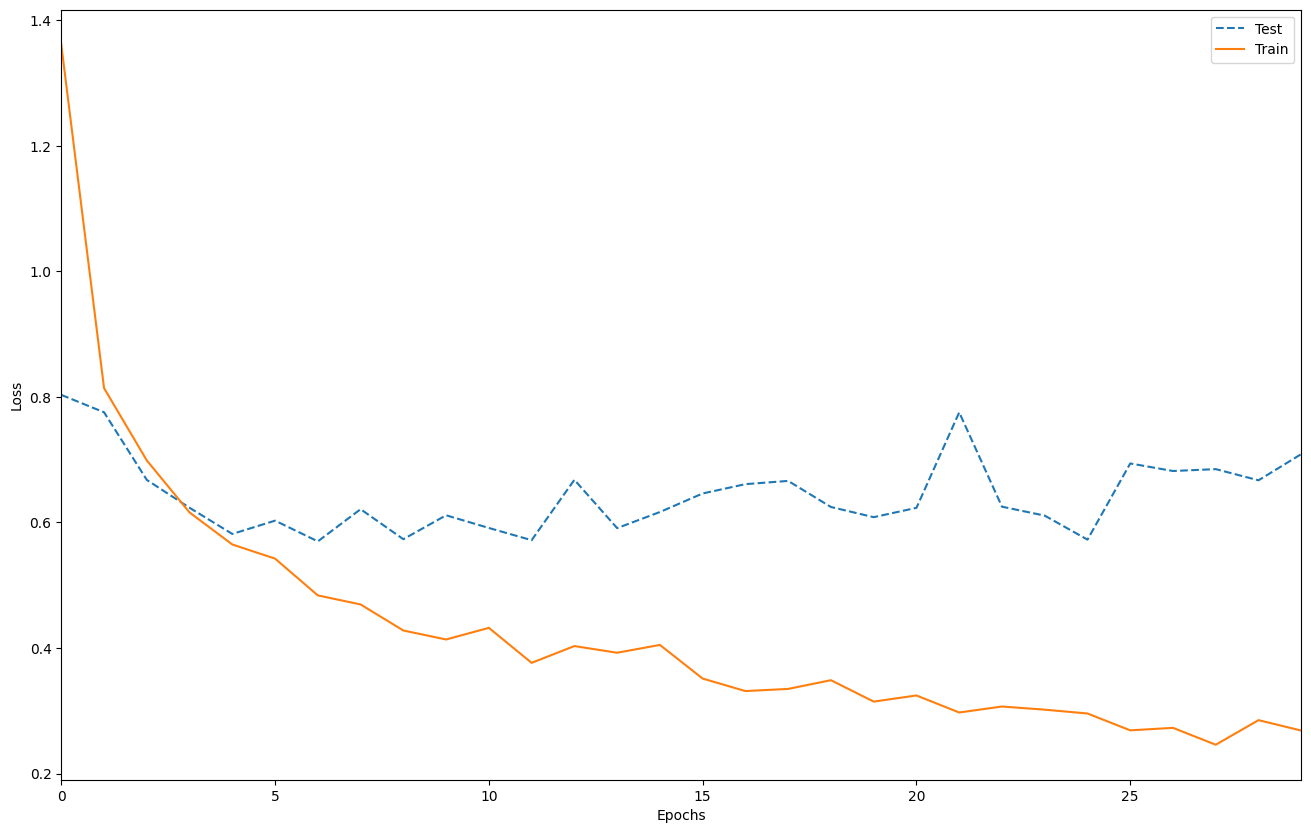

In [23]:
plot_loss(history) # 기록된 history로 loss 출력
eval_model(model) # 학습된 model 평가

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [25]:
model.compile(optimizer='adam', # Adam optimizer
              loss='sparse_categorical_crossentropy', # categorical_crossentropy: 다중 분류 손실함수. sparse: integer type 클래스로 one-hot encoding 과정을 하지 않아도 된다.
              metrics=['accuracy']) # 정확도로 평가

history = model.fit(train_images[:2000], # 학습 이미지 2000개
          train_labels[:2000], # 학습 레이블 2000개
          epochs=30, # 에폭 = 30
          validation_data=(test_images, test_labels) # 평가셋으로 검증
         )

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9015 - loss: 0.2949 - val_accuracy: 0.8224 - val_loss: 0.7751
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8970 - loss: 0.2857 - val_accuracy: 0.8067 - val_loss: 0.8822
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9160 - loss: 0.2249 - val_accuracy: 0.8084 - val_loss: 0.8456
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9125 - loss: 0.2536 - val_accuracy: 0.8135 - val_loss: 0.7646
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9150 - loss: 0.2697 - val_accuracy: 0.8190 - val_loss: 0.7287
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9285 - loss: 0.1959 - val_accuracy: 0.8287 - val_loss: 0.7660
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9230 - loss: 0.2396 - val_accuracy: 0.8169 - val_loss: 0.6734
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9265 - loss: 0.2301 - val_accuracy: 0.8223 - v

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8079 - loss: 0.7882
Test accuracy: 0.8079000115394592


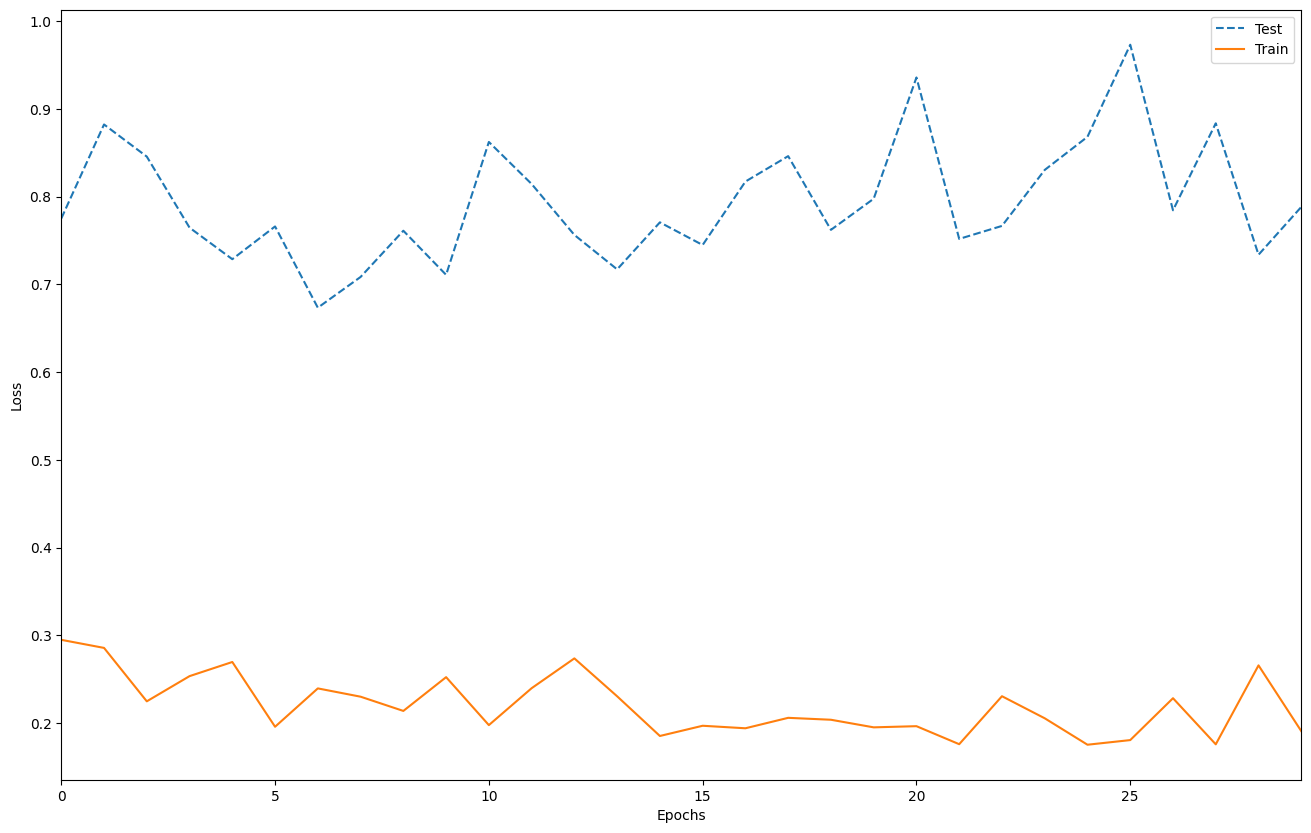

In [26]:
plot_loss(history) # 기록된 history로 loss 출력
eval_model(model) # 학습된 model 평가

In [3]:
drop_rate = 0.5

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(rate=drop_rate),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(rate=drop_rate),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(rate=drop_rate),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

c:\Users\Creation23\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.compile(optimizer='adam', # Adam optimizer
              loss='sparse_categorical_crossentropy', # categorical_crossentropy: 다중 분류 손실함수. sparse: integer type 클래스로 one-hot encoding 과정을 하지 않아도 된다.
              metrics=['accuracy']) # 정확도로 평가

history = model.fit(train_images[:2000], # 학습 이미지 2000개
          train_labels[:2000], # 학습 레이블 2000개
          epochs=30, # 에폭 = 30
          validation_data=(test_images, test_labels) # 평가셋으로 검증
         )

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5215 - loss: 1.4348 - val_accuracy: 0.6651 - val_loss: 1.0088
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7100 - loss: 0.8868 - val_accuracy: 0.7088 - val_loss: 0.8336
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7560 - loss: 0.7552 - val_accuracy: 0.7322 - val_loss: 0.7673
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7755 - loss: 0.6934 - val_accuracy: 0.7446 - val_loss: 0.7204
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8010 - loss: 0.6313 - val_accuracy: 0.7680 - val_loss: 0.6803
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8140 - loss: 0.5991 - val_accuracy: 0.7762 - val_loss: 0.6618
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8225 - loss: 0.5634 - val_accuracy: 0.7818 - val_loss: 0.6506
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8330 - loss: 0.5467 - val_accuracy: 0.7797 - val_loss:

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8077 - loss: 0.5618
Test accuracy: 0.807699978351593


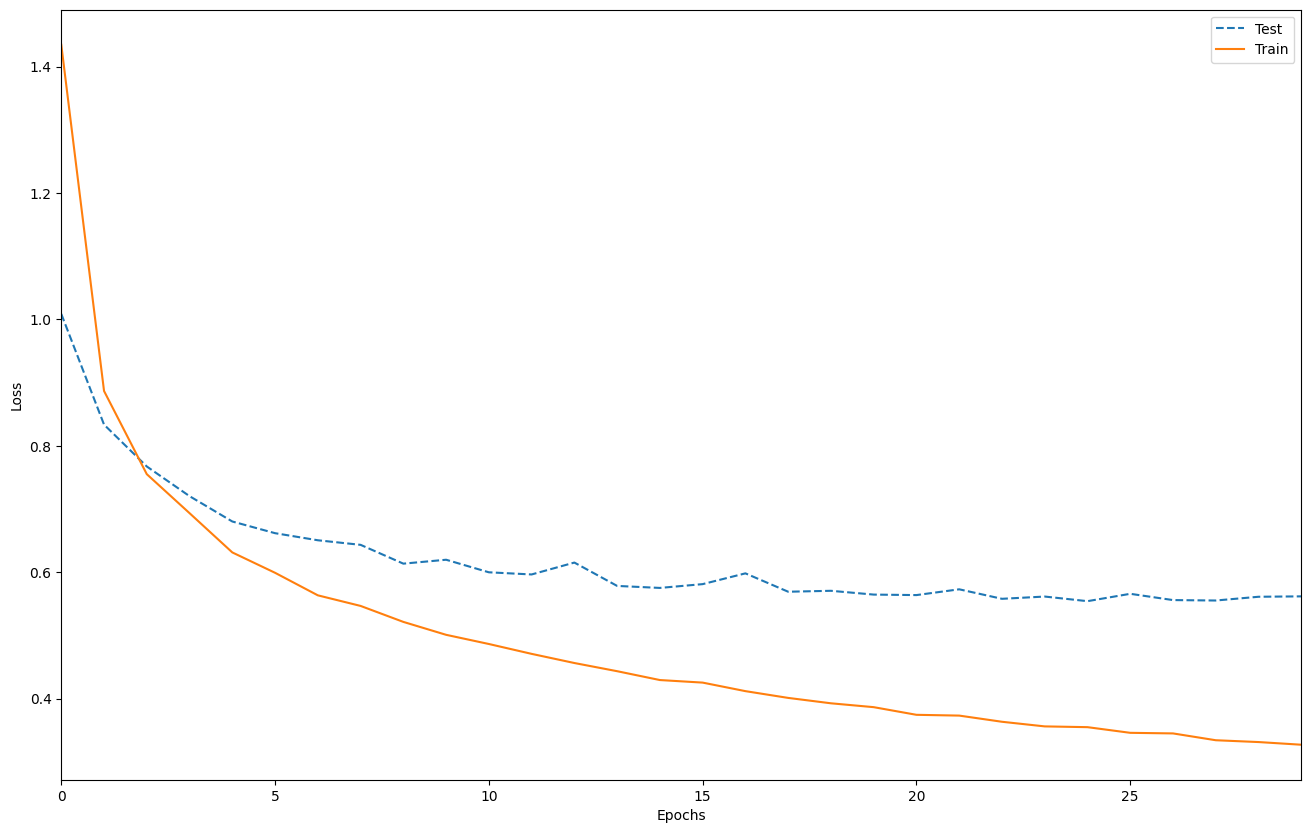

In [21]:
plot_loss(history) # 기록된 history로 loss 출력
eval_model(model) # 학습된 model 평가

In [22]:
drop_rate = 0.3

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(rate=drop_rate),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(rate=drop_rate),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(rate=drop_rate),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [23]:
model.compile(optimizer='adam', # Adam optimizer
              loss='sparse_categorical_crossentropy', # categorical_crossentropy: 다중 분류 손실함수. sparse: integer type 클래스로 one-hot encoding 과정을 하지 않아도 된다.
              metrics=['accuracy']) # 정확도로 평가

history = model.fit(train_images[:2000], # 학습 이미지 2000개
          train_labels[:2000], # 학습 레이블 2000개
          epochs=30, # 에폭 = 30
          validation_data=(test_images, test_labels) # 평가셋으로 검증
         )

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5540 - loss: 1.2362 - val_accuracy: 0.7010 - val_loss: 0.7869
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7370 - loss: 0.7322 - val_accuracy: 0.7404 - val_loss: 0.6699
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7590 - loss: 0.6630 - val_accuracy: 0.7767 - val_loss: 0.5996
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8000 - loss: 0.5611 - val_accuracy: 0.7823 - val_loss: 0.5986
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8250 - loss: 0.4947 - val_accuracy: 0.7863 - val_loss: 0.6177
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8180 - loss: 0.5010 - val_accuracy: 0.7991 - val_loss: 0.5658
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8400 - loss: 0.4512 - val_accuracy: 0.7941 - val_loss: 0.6308
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8470 - loss: 0.4313 - val_accuracy: 0.8117 - v

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8116 - loss: 0.6950
Test accuracy: 0.8116000294685364


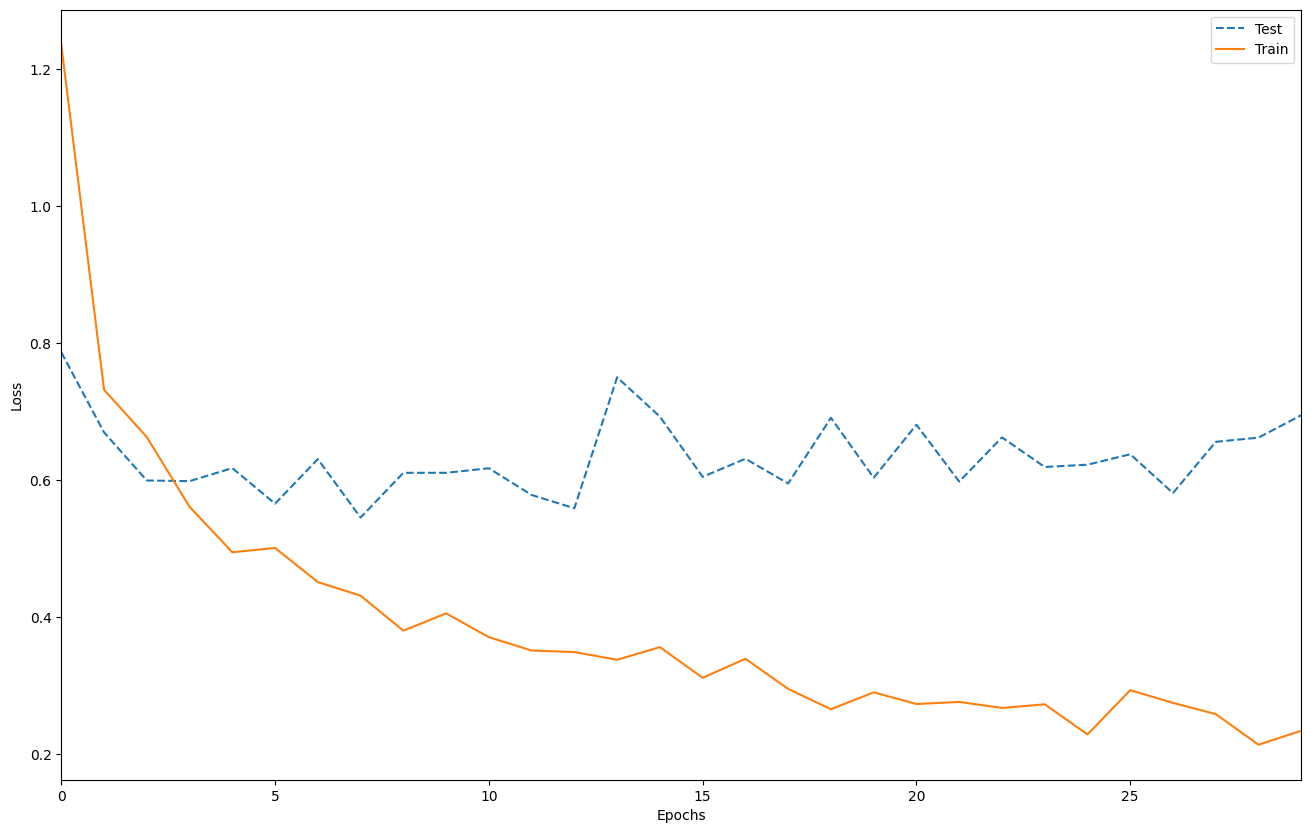

In [24]:
plot_loss(history) # 기록된 history로 loss 출력
eval_model(model) # 학습된 model 평가

In [25]:
drop_rate = 0.3

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # (28,28) 크기의 입력을 784로 평탄화
    keras.layers.Dense(512, activation=tf.nn.relu), # 784 -> 512. 활성함수는 relu
    keras.layers.Dropout(rate=drop_rate), # 설정해둔 확률로 dropout
    keras.layers.Dense(512, activation=tf.nn.relu), # 512 -> 512. 활성함수는 relu
    keras.layers.Dropout(rate=drop_rate), # 설정해둔 확률로 dropout
    keras.layers.Dense(512, activation=tf.nn.relu), # 512 -> 512. 활성함수는 relu
    keras.layers.Dropout(rate=drop_rate), # 설정해둔 확률로 dropout
    keras.layers.Dense(512, activation=tf.nn.relu), # 512 -> 512. 활성함수는 relu
    keras.layers.Dropout(rate=drop_rate), # 설정해둔 확률로 dropout
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(rate=drop_rate),
    keras.layers.Dense(10, activation=tf.nn.softmax) # 512 -> 10. softmax로 확률값 반환
])

In [26]:
model.compile(optimizer='adam', # Adam optimizer
              loss='sparse_categorical_crossentropy', # categorical_crossentropy: 다중 분류 손실함수. sparse: integer type 클래스로 one-hot encoding 과정을 하지 않아도 된다.
              metrics=['accuracy']) # 정확도로 평가

history = model.fit(train_images[:2000], # 학습 이미지 2000개
          train_labels[:2000], # 학습 레이블 2000개
          epochs=30, # 에폭 = 30
          validation_data=(test_images, test_labels) # 평가셋으로 검증
         )

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.4280 - loss: 1.4989 - val_accuracy: 0.6491 - val_loss: 0.8610
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.6205 - loss: 0.9317 - val_accuracy: 0.7220 - val_loss: 0.7792
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7095 - loss: 0.7758 - val_accuracy: 0.7098 - val_loss: 0.8114
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7420 - loss: 0.6968 - val_accuracy: 0.7441 - val_loss: 0.6805
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7570 - loss: 0.6340 - val_accuracy: 0.7717 - val_loss: 0.6201
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7690 - loss: 0.6058 - val_accuracy: 0.7617 - val_loss: 0.6779
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7845 - loss: 0.5623 - val_accuracy: 0.7736 - val_loss: 0.6275
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8050 - loss: 0.5233 - val_accuracy: 0.7610 - v

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8168 - loss: 0.7561
Test accuracy: 0.8167999982833862


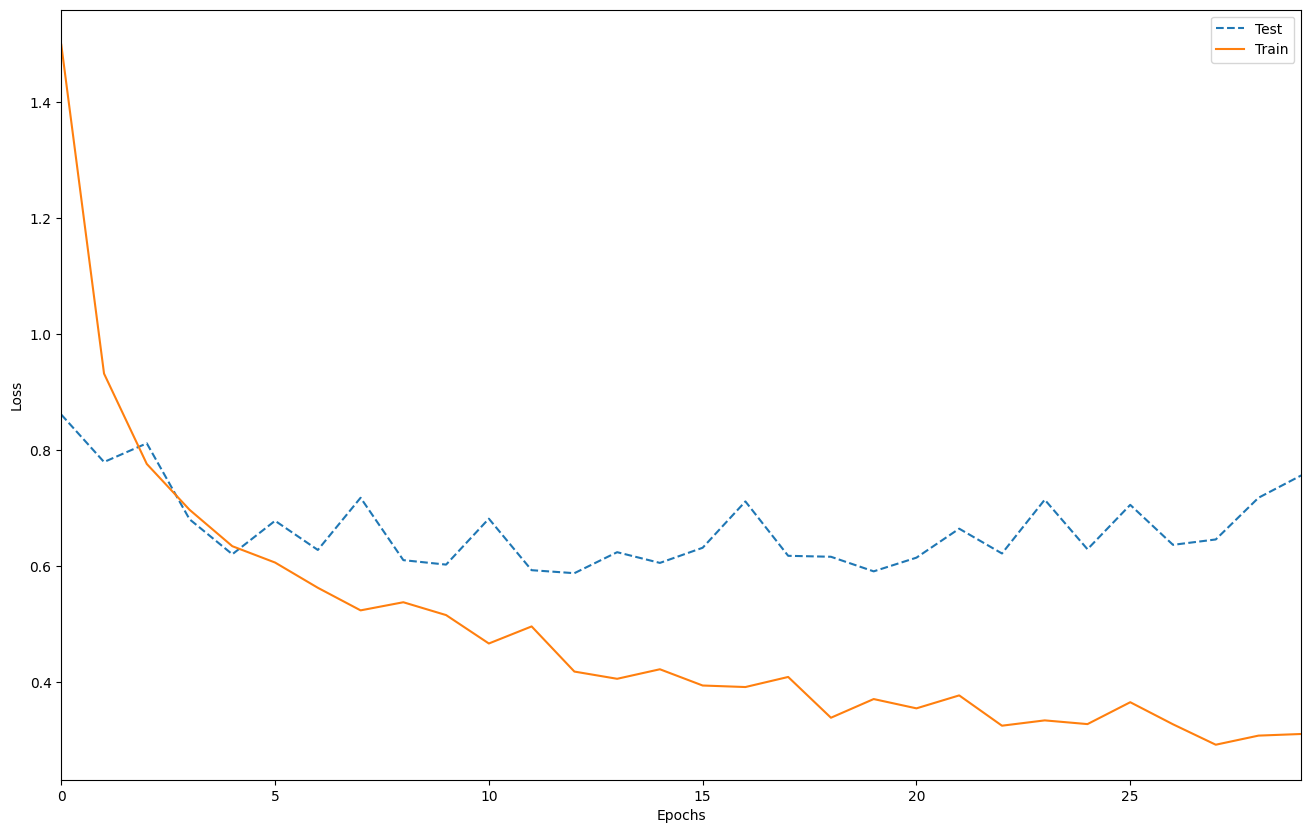

In [27]:
plot_loss(history) # 기록된 history로 loss 출력
eval_model(model) # 학습된 model 평가

In [28]:
model.compile(optimizer='adam', # Adam optimizer
              loss='sparse_categorical_crossentropy', # categorical_crossentropy: 다중 분류 손실함수. sparse: integer type 클래스로 one-hot encoding 과정을 하지 않아도 된다.
              metrics=['accuracy']) # 정확도로 평가

history = model.fit(train_images[:2000], # 학습 이미지 2000개
          train_labels[:2000], # 학습 레이블 2000개
          epochs=20, # 에폭 = 30
          validation_data=(test_images, test_labels) # 평가셋으로 검증
         )

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.8820 - loss: 0.3500 - val_accuracy: 0.8200 - val_loss: 0.6443
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8960 - loss: 0.2905 - val_accuracy: 0.8157 - val_loss: 0.7340
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9000 - loss: 0.2823 - val_accuracy: 0.8139 - val_loss: 0.8761
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8920 - loss: 0.3144 - val_accuracy: 0.8125 - val_loss: 0.7340
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9025 - loss: 0.2631 - val_accuracy: 0.7868 - val_loss: 0.9701
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9025 - loss: 0.2821 - val_accuracy: 0.8046 - val_loss: 0.8118
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8990 - loss: 0.2951 - val_accuracy: 0.8053 - val_loss: 0.9284
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8980 - loss: 0.3231 - val_accuracy: 0.8230 - v

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8061 - loss: 0.7377
Test accuracy: 0.8061000108718872


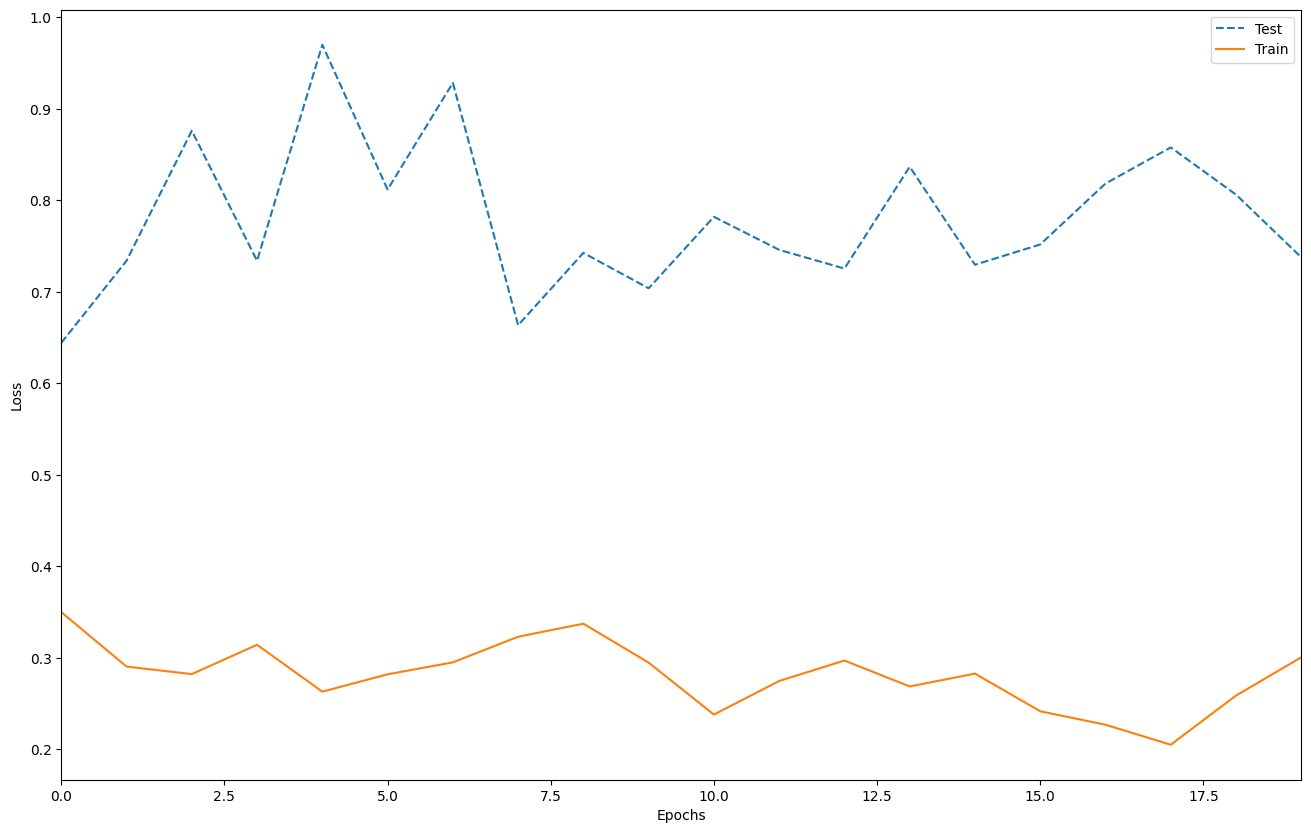

In [29]:
plot_loss(history) # 기록된 history로 loss 출력
eval_model(model) # 학습된 model 평가

In [30]:
drop_rate = 0.2

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # (28,28) 크기의 입력을 784로 평탄화
    keras.layers.Dense(512, activation=tf.nn.relu), # 784 -> 512. 활성함수는 relu
    keras.layers.Dropout(rate=drop_rate), # 설정해둔 확률로 dropout
    keras.layers.Dense(512, activation=tf.nn.relu), # 512 -> 512. 활성함수는 relu
    keras.layers.Dropout(rate=drop_rate), # 설정해둔 확률로 dropout
    keras.layers.Dense(512, activation=tf.nn.relu), # 512 -> 512. 활성함수는 relu
    keras.layers.Dropout(rate=drop_rate), # 설정해둔 확률로 dropout
    keras.layers.Dense(512, activation=tf.nn.relu), # 512 -> 512. 활성함수는 relu
    keras.layers.Dropout(rate=drop_rate), # 설정해둔 확률로 dropout
    keras.layers.Dense(10, activation=tf.nn.softmax) # 512 -> 10. softmax로 확률값 반환
])

In [31]:
model.compile(optimizer='adam', # Adam optimizer
              loss='sparse_categorical_crossentropy', # categorical_crossentropy: 다중 분류 손실함수. sparse: integer type 클래스로 one-hot encoding 과정을 하지 않아도 된다.
              metrics=['accuracy']) # 정확도로 평가

history = model.fit(train_images[:2000], # 학습 이미지 2000개
          train_labels[:2000], # 학습 레이블 2000개
          epochs=20, # 에폭 = 30
          validation_data=(test_images, test_labels) # 평가셋으로 검증
         )

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5695 - loss: 1.1681 - val_accuracy: 0.6993 - val_loss: 0.8094
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7205 - loss: 0.7576 - val_accuracy: 0.7287 - val_loss: 0.7565
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7725 - loss: 0.5910 - val_accuracy: 0.7670 - val_loss: 0.6431
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8000 - loss: 0.5470 - val_accuracy: 0.7403 - val_loss: 0.8251
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8145 - loss: 0.5470 - val_accuracy: 0.7664 - val_loss: 0.6614
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8255 - loss: 0.4747 - val_accuracy: 0.8040 - val_loss: 0.5622
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8495 - loss: 0.4136 - val_accuracy: 0.7820 - val_loss: 0.6790
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8425 - loss: 0.4299 - val_accuracy: 0.8153 - v

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8040 - loss: 0.6326
Test accuracy: 0.8040000200271606


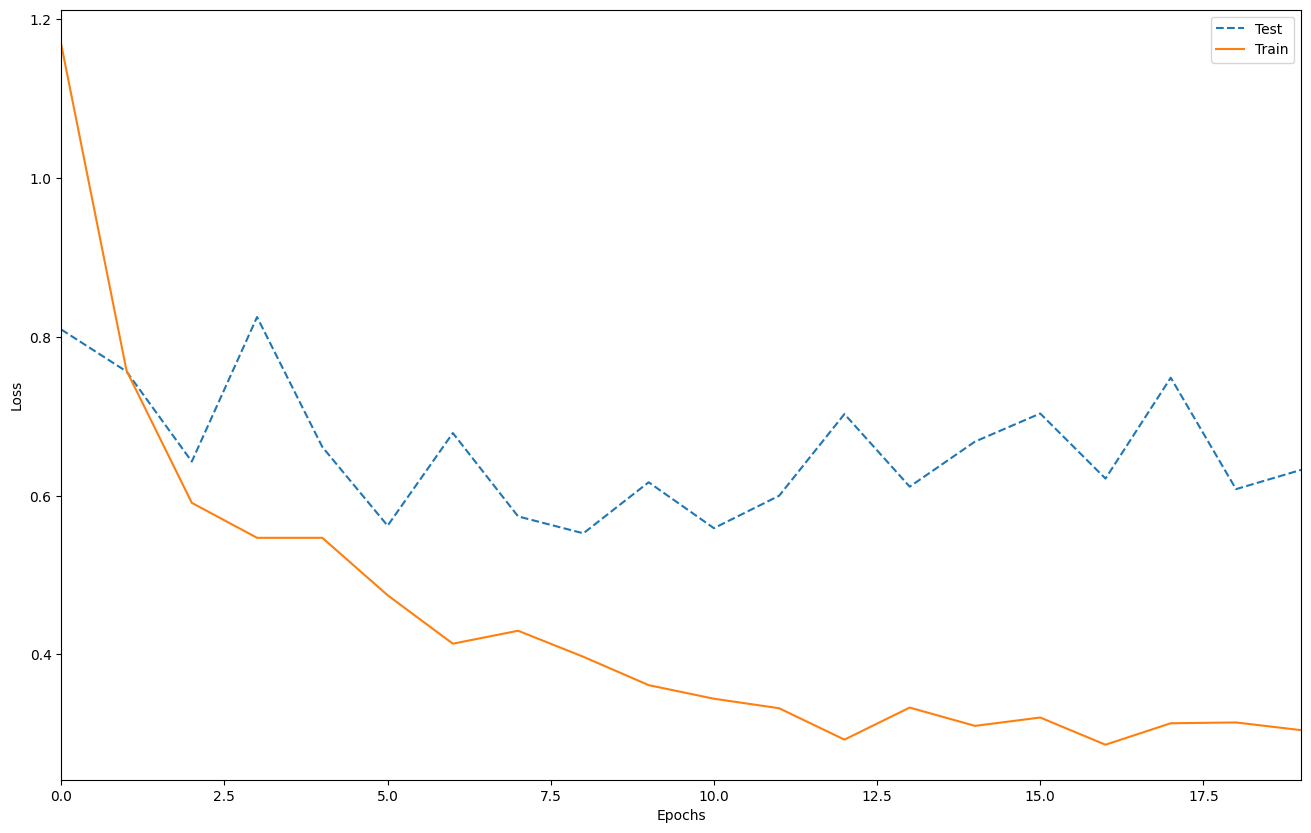

In [32]:
plot_loss(history) # 기록된 history로 loss 출력
eval_model(model) # 학습된 model 평가

In [33]:
model.compile(optimizer='adam', # Adam optimizer
              loss='sparse_categorical_crossentropy', # categorical_crossentropy: 다중 분류 손실함수. sparse: integer type 클래스로 one-hot encoding 과정을 하지 않아도 된다.
              metrics=['accuracy']) # 정확도로 평가

history = model.fit(train_images[:2000], # 학습 이미지 2000개
          train_labels[:2000], # 학습 레이블 2000개
          epochs=30, # 에폭 = 30
          validation_data=(test_images, test_labels) # 평가셋으로 검증
         )

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.8950 - loss: 0.3149 - val_accuracy: 0.8112 - val_loss: 0.6988
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9045 - loss: 0.2810 - val_accuracy: 0.8029 - val_loss: 0.8530
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9195 - loss: 0.2202 - val_accuracy: 0.8114 - val_loss: 0.7975
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9200 - loss: 0.2198 - val_accuracy: 0.8145 - val_loss: 0.7599
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9145 - loss: 0.2459 - val_accuracy: 0.8178 - val_loss: 0.7968
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9200 - loss: 0.2250 - val_accuracy: 0.8305 - val_loss: 0.6314
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9270 - loss: 0.2140 - val_accuracy: 0.8134 - val_loss: 0.7063
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9250 - loss: 0.2172 - val_accuracy: 0.8231 - v

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8129 - loss: 0.8031
Test accuracy: 0.8129000067710876


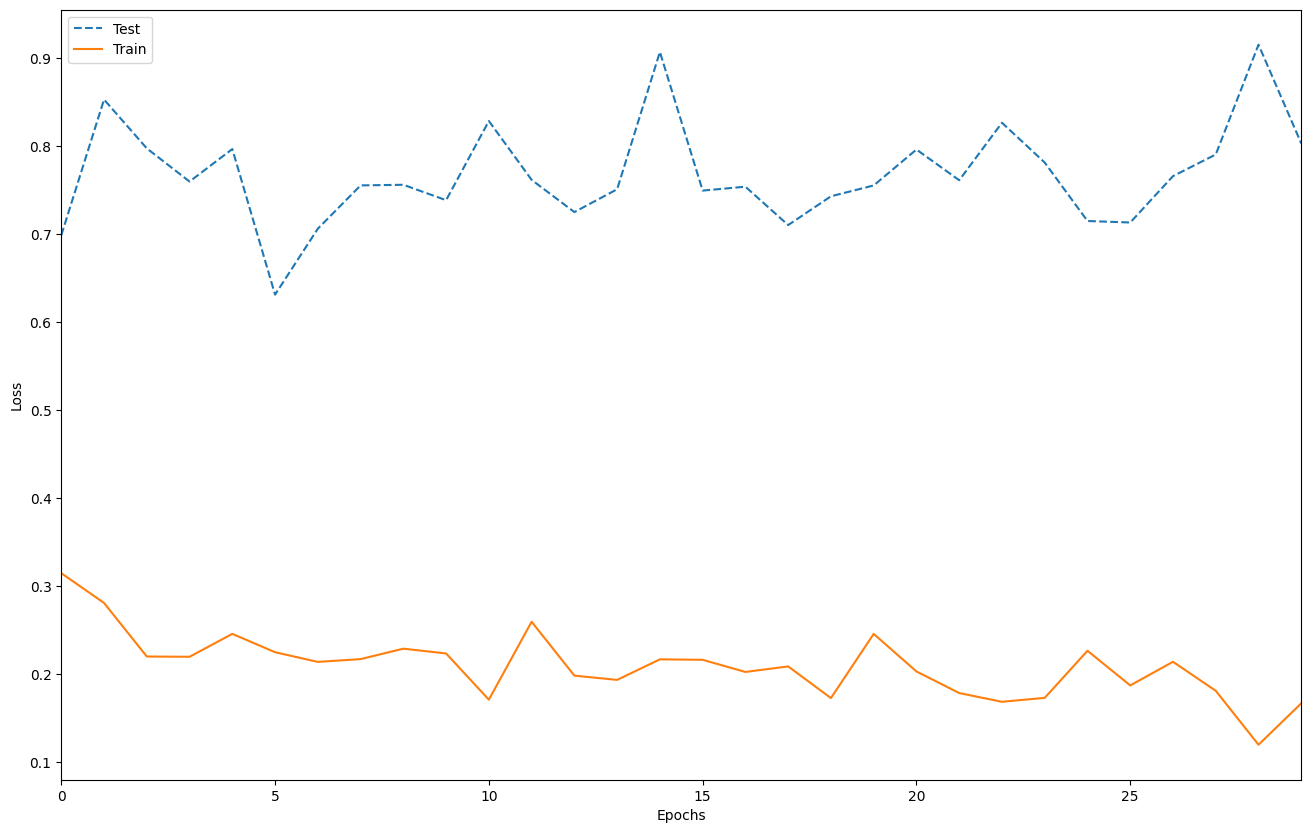

In [34]:
plot_loss(history) # 기록된 history로 loss 출력
eval_model(model) # 학습된 model 평가

In [35]:
drop_rate = 0.3

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(drop_rate),

    keras.layers.Dense(256, activation='relu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(drop_rate),

    keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),

    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [36]:
model.compile(optimizer='adam', # Adam optimizer
              loss='sparse_categorical_crossentropy', # categorical_crossentropy: 다중 분류 손실함수. sparse: integer type 클래스로 one-hot encoding 과정을 하지 않아도 된다.
              metrics=['accuracy']) # 정확도로 평가

history = model.fit(train_images[:2000], # 학습 이미지 2000개
          train_labels[:2000], # 학습 레이블 2000개
          epochs=30, # 에폭 = 30
          validation_data=(test_images, test_labels) # 평가셋으로 검증
         )

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6650 - loss: 0.9967 - val_accuracy: 0.6816 - val_loss: 1.0022
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7710 - loss: 0.6490 - val_accuracy: 0.7531 - val_loss: 0.7252
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7945 - loss: 0.5674 - val_accuracy: 0.7600 - val_loss: 0.6778
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8310 - loss: 0.4734 - val_accuracy: 0.7925 - val_loss: 0.5849
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8275 - loss: 0.4675 - val_accuracy: 0.7946 - val_loss: 0.6096
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8500 - loss: 0.4287 - val_accuracy: 0.8027 - val_loss: 0.5707
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8450 - loss: 0.4331 - val_accuracy: 0.7845 - val_loss: 0.6254
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8605 - loss: 0.3854 - val_accuracy: 0.7979 - v

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8079 - loss: 0.6731
Test accuracy: 0.8079000115394592


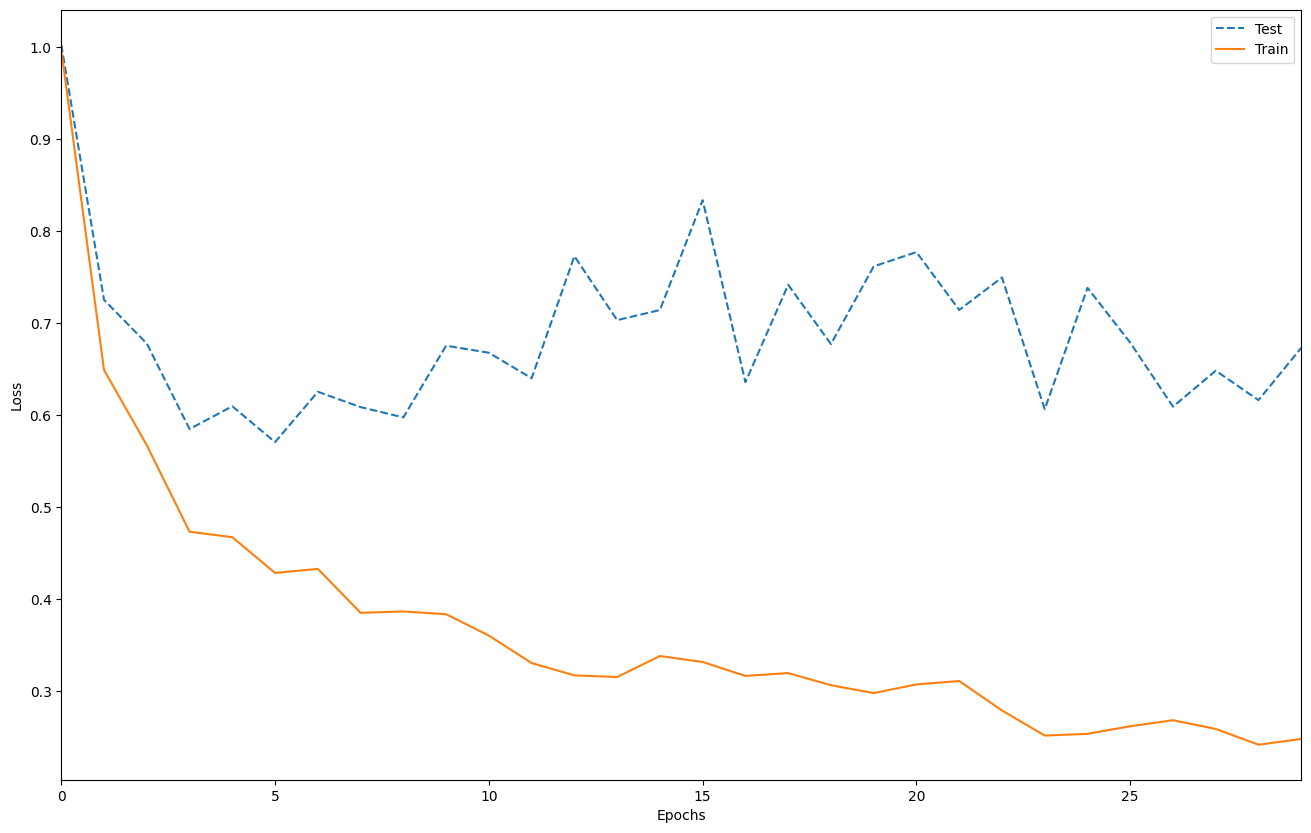

In [37]:
plot_loss(history) # 기록된 history로 loss 출력
eval_model(model) # 학습된 model 평가

In [42]:

drop_rate = 0.3

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),

    keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(drop_rate),

    keras.layers.Dense(256, activation='relu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(drop_rate),

    keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),

    keras.layers.Dense(10, activation='softmax')  # 최종 출력층만 softmax
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

callbacks = [
    keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
]

history = model.fit(train_images, train_labels,   # 전체 데이터 사용 권장
                    epochs=30,
                    batch_size=128,
                    validation_data=(test_images, test_labels),
                    callbacks=callbacks)



Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8133 - loss: 0.5199 - val_accuracy: 0.8201 - val_loss: 0.5129 - learning_rate: 0.0010
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8532 - loss: 0.3994 - val_accuracy: 0.8587 - val_loss: 0.4011 - learning_rate: 0.0010
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8616 - loss: 0.3737 - val_accuracy: 0.8493 - val_loss: 0.4194 - learning_rate: 0.0010
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8686 - loss: 0.3572 - val_accuracy: 0.8675 - val_loss: 0.3666 - learning_rate: 0.0010
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8721 - loss: 0.3485 - val_accuracy: 0.8590 - val_loss: 0.3910 - learning_rate: 0.0010
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8759 - loss: 0.3381 - val_accuracy: 0.8615 - val_loss: 0.3646 - learning_rate: 0.0010
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8772 - loss: 0.3310 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8987 - loss: 0.2913
Test accuracy: 0.8986999988555908


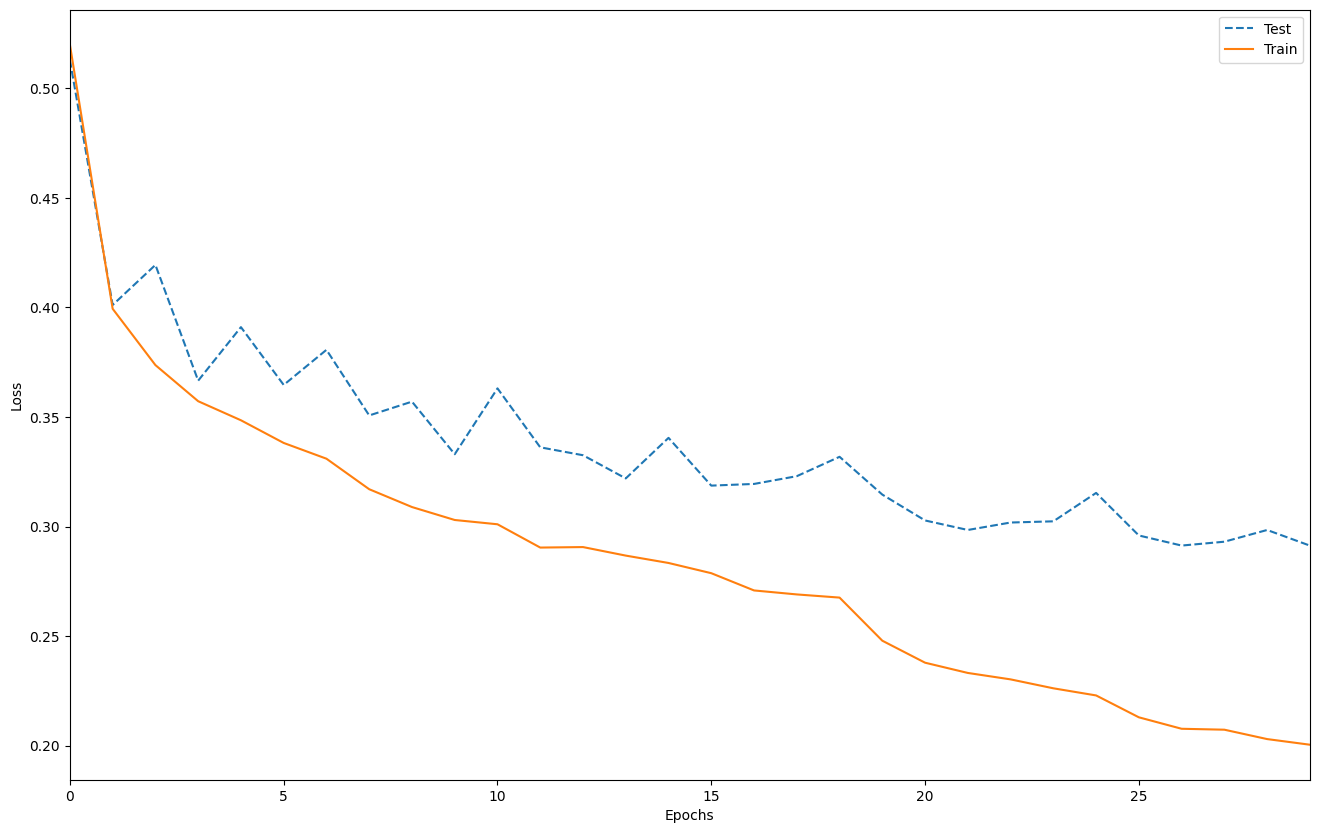

In [43]:
plot_loss(history) # 기록된 history로 loss 출력
eval_model(model) # 학습된 model 평가